In [128]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
import matplotlib as plt

In [161]:
data = urlopen('https://www.insee.fr/fr/statistiques/fichier/4768335/etatcivil2019_nais2019_csv.zip')
zipfile = ZipFile(BytesIO(data.read()))
test = []
with zipfile as f:
    for name in f.namelist():
        with f.open(name) as zd:
            test.append(pd.read_csv(zd, delimiter=';'))

/home/turtlesmoke/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
db, varmod = test
df = db#.head(50).copy()

In [4]:
df

,ANAIS,ACCOUCHR,AGEMERE,AGEPERE,AGEXACTM,AGEXACTP,AMAR,ARECC,ARECM,ARECP,...,MRECC,MRECM,MRECP,NBENF,ORIGINOM,SEXE,SITUATMR,SITUATPR,TUCOM,TUDOM
0,2019,ES,33,33,32,32,0,0,2019,2019,...,0,1,1,1,1.0,2,S,S,NaN,9
1,2019,ES,36,40,35,39,0,0,2019,2019,...,0,7,7,1,1.0,2,S,S,NaN,9
2,2019,ES,37,41,37,41,2010,0,0,0,...,0,0,0,1,1.0,1,NaN,NS,NaN,9
3,2019,ES,26,29,26,29,0,0,2019,0,...,0,12,0,1,2.0,2,S,ND,NaN,9
4,2019,AU,27,31,26,31,0,0,2019,0,...,0,4,0,1,1.0,1,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753378,2019,ES,27,25,26,25,0,0,2019,2019,...,0,5,5,1,1.0,1,ND,ND,P,9
753379,2019,ES,25,24,25,24,0,2019,0,0,...,2,0,0,1,1.0,1,NaN,S,P,9
753380,2019,ES,32,26,32,26,0,0,2019,2019,...,0,6,3,1,1.0,1,S,S,P,9
753381,2019,ES,30,28,30,28,0,2019,0,0,...,9,0,0,1,3.0,2,S,NaN,M,9


In [5]:
sum(df['AGEPERE'] == 46)

42174

In [6]:
import dateutil as du

def convert_date(y, m):
    return du.parser.parse(f"15-{m}-{y}")

# df.groupby(['ANAIS', 'MNAIS']).mean()
df['date'] = df.apply(lambda x: convert_date(x.ANAIS, x.MNAIS), axis=1)
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

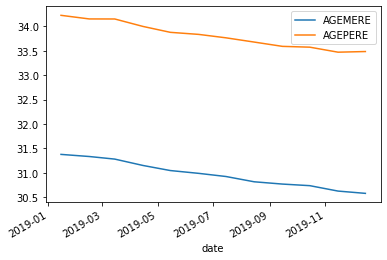

In [7]:
d_date = df.groupby('date').mean()
# print(d_date[['AGEMERE', 'AGEPERE']])
d_date[['AGEMERE', 'AGEPERE']].plot()

date
2019-01-15    63179
2019-02-15    54876
2019-03-15    60025
2019-04-15    59142
2019-05-15    63647
2019-06-15    62938
2019-07-15    67855
2019-08-15    66243
2019-09-15    64774
2019-10-15    65872
2019-11-15    61855
2019-12-15    62977
dtype: int64


<AxesSubplot:xlabel='date'>

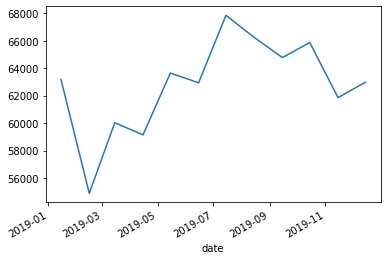

In [181]:
d_nai = df.groupby('date').size()
print(d_nai)
d_nai.plot()

    AGEMERE  AGEPERE
17     2713      374
18     2969      717
19     5752     1628
20     8790     2907
21    11851     4763
22    15171     7018
23    19482     9669
24    24026    13262
25    28782    17374
26    34443    22019
27    41717    28612
28    47120    36229
29    52450    42760
30    55460    45900
31    56708    49803
32    54511    50691
33    50989    51157
34    46049    47981
35    40796    44128
36    34866    41249
37    30516    36862
38    24677    32548
39    20220    28592
40    15033    23423
41    10490    19889
42     7349    16901
43     4500    13630
44     2653    11522
45     1512     9601
46     1788    42174
753383 753383


<AxesSubplot:>

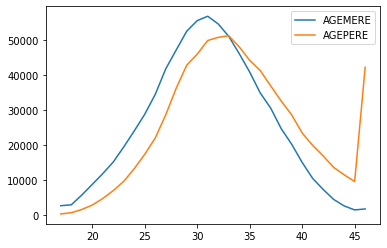

In [178]:
d_mere = df.groupby('AGEMERE').size().rename('AGEMERE')
d_pere = df.groupby('AGEPERE').size().rename('AGEPERE')
# print(d_date[['AGEMERE', 'AGEPERE']])
# plt.plot(d_pere)

db_mere_pere = pd.concat([d_mere, d_pere], axis=1)
print(db_mere_pere)
print(sum(d_mere), sum(d_pere))
db_mere_pere.plot()